# Variables vs Tournament Outcomes
Looks at how previous variables compare with tournament outcomes

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import os, sys
import random

#Import other files
raw_path = os.path.join('..', 'data', 'raw')
proc_path = os.path.join('..', 'data', 'processed')
sys.path.append(os.path.join('..', 'src'))
from viz.Correl import *
%matplotlib inline  

In [2]:
#Read in Kaggle data
tourney = pd.read_csv(os.path.join(raw_path, 'TourneyCompactResults.csv'))
teams = pd.read_csv(os.path.join(raw_path, 'Teams.csv'))

#Read in features data
features = pd.read_csv(os.path.join(proc_path, 'team_features.csv'))

In [3]:
#Randomly swithces W and L teams
random_picks_to_switch = random.sample(tourney.index, len(tourney.index)/2)
replace_wl = tourney.ix[random_picks_to_switch,:].copy()
replace_wl_renamed = pd.DataFrame()
replace_wl_renamed['Wscore'] = replace_wl['Lscore']
replace_wl_renamed['Lscore'] = replace_wl['Wscore']
replace_wl_renamed['Wteam'] = replace_wl['Lteam']
replace_wl_renamed['Lteam'] = replace_wl['Wteam']
replace_wl_renamed['Season'] = replace_wl['Season']
# replace_w1 = replace_wl.rename(index=str, columns={'Wscore':'score', 'Wteam_Name':'team_Name'})
# replace_w1 = replace_wl.rename(index=str, columns={'Lscore':'Wscore', 'Lteam_Name':'Wteam_Name'})
# replace_w1 = replace_wl.rename(index=str, columns={'score':'Lscore', 'team_Name':'Lteam_Name'})
print len(tourney)
tourney = tourney.drop(random_picks_to_switch)
print len(tourney)
tourney = tourney.append(replace_wl_renamed)
print len(tourney)
tourney = tourney[['Lscore', 'Wscore', 'Wteam', 'Lteam', 'Season']].reset_index(drop=True)

2050
1025
2050


In [4]:
# #Joins features with team results
# w_teams = teams.rename(index=str, columns={'Team_Name': "Wteam_Name"})
# l_teams = teams.rename(index=str, columns={'Team_Name': "Lteam_Name"})
# tourney = pd.merge(tourney, w_teams, left_on='Wteam', right_on='Team_Id').drop(['Team_Id', 'Wteam'], 1)
# tourney = pd.merge(tourney, l_teams, left_on='Lteam', right_on='Team_Id').drop(['Team_Id', 'Lteam'], 1)

In [5]:
tourney

,Lscore,Wscore,Wteam,Lteam,Season
0,43,68,1207,1250,1985
1,55,58,1229,1425,1985
2,38,49,1242,1325,1985
3,54,78,1256,1338,1985
4,58,59,1260,1233,1985
5,57,76,1314,1292,1985
6,70,79,1323,1333,1985
7,57,60,1396,1439,1985
8,80,85,1424,1361,1985
9,53,55,1130,1403,1985


In [6]:
features
#Need to make join below work

,Team,Season,total_poss,poss_stdev,oeff,deff,SOS,home_adv,o3P,d3P,WinPct,Clutch
0,1101,2014,53.333333,13.785258,0.809524,0.952381,0.478367,0.285714,0.224524,0.150336,0.095238,0.137500
1,1101,2015,51.071429,9.820344,0.785714,1.000000,0.470304,0.233333,0.254832,0.169493,0.250000,-0.269231
2,1101,2016,57.370370,9.755267,0.925926,1.000000,0.439129,0.357955,0.198579,0.142469,0.333333,0.000000
3,1102,2003,42.857143,9.312335,0.964286,0.964286,0.525596,0.492308,0.287439,0.159683,0.428571,-0.075000
4,1102,2004,42.571429,8.974980,1.000000,1.142857,0.471848,0.400000,0.317870,0.130644,0.785714,0.095238
5,1102,2005,45.310345,6.928736,0.931034,1.172414,0.488794,0.563725,0.326271,0.140728,0.586207,-0.284211
6,1102,2006,45.250000,7.290913,1.000000,1.107143,0.488110,0.428571,0.295960,0.193523,0.785714,-0.133333
7,1102,2007,51.566667,7.959741,0.900000,1.066667,0.532551,0.366071,0.288814,0.195091,0.733333,-0.291667
8,1102,2008,46.500000,10.922284,0.928571,0.928571,0.504750,0.428571,0.254793,0.278273,0.500000,0.212121
9,1102,2009,45.724138,9.848483,0.862069,0.862069,0.520160,0.119048,0.231219,0.242021,0.275862,-0.208333


In [7]:
#Joins features with tourney results
print len(tourney)
tourney = tourney.merge(features, left_on=['Season', 'Wteam'], right_on=['Season', 'Team'])
print len(tourney)
tourney = tourney.merge(features, left_on=['Season', 'Lteam'], right_on=['Season', 'Team'], suffixes=('_W', '_L'))
tourney = tourney.drop(['Team_W', 'Team_L'], 1)
print len(tourney)

2050
914
914


In [8]:
#Creates target variable for games
tourney['Outcome'] = tourney['Wscore'] - tourney['Lscore']

In [9]:
#Outputs outcome data
tourney.to_csv(os.path.join(proc_path, 'scoring_set_v1.csv'), index=False)

         total_poss_W  total_poss_L    oeff_W    oeff_L    deff_W    deff_L
Outcome      0.086938     -0.041027  0.057581 -0.086321 -0.004696  0.083496


//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


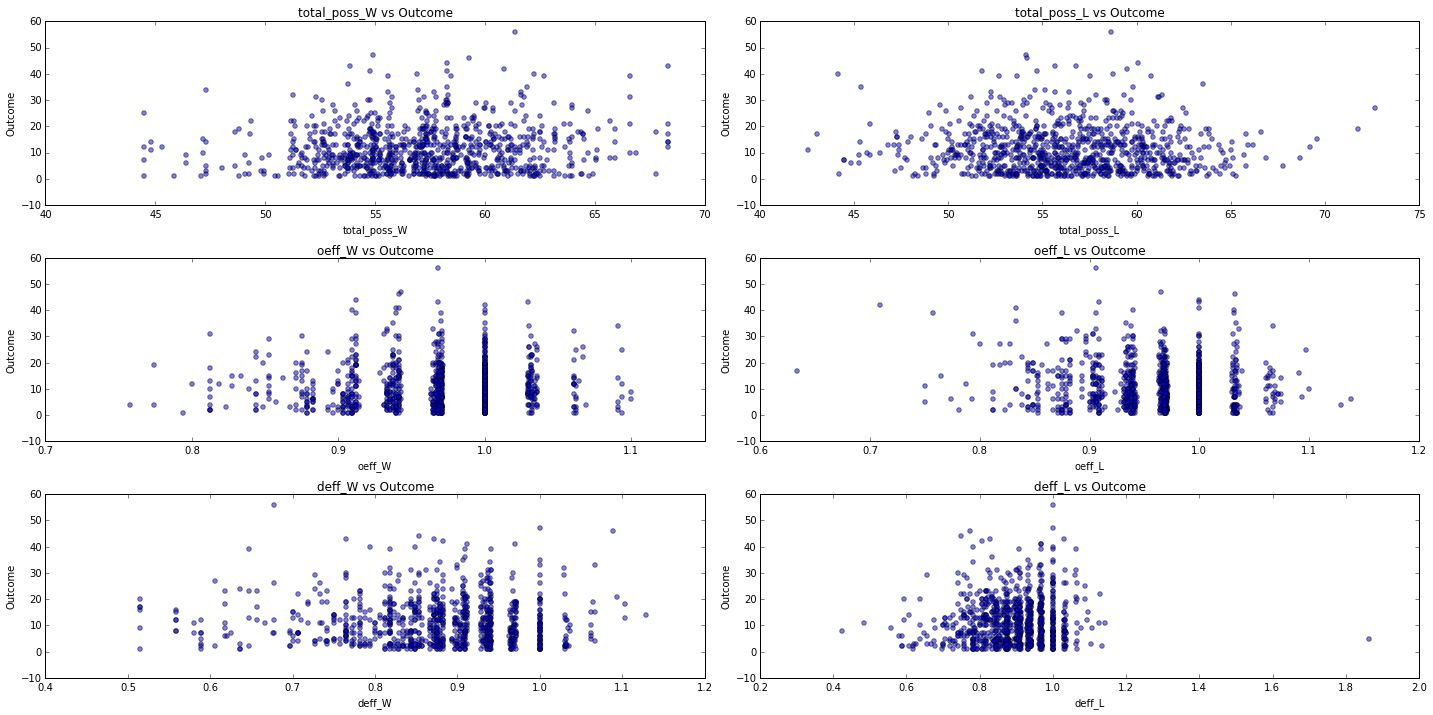

In [8]:
#Creates correlation charts for each variable
create_correl_charts(tourney, 'Outcome', ['total_poss_W', 'total_poss_L', 'oeff_W', 'oeff_L', 'deff_W', 'deff_L'])

            SOS_W     SOS_L  home_adv_W  home_adv_L
Outcome  0.129666 -0.327081   -0.109924   -0.037509


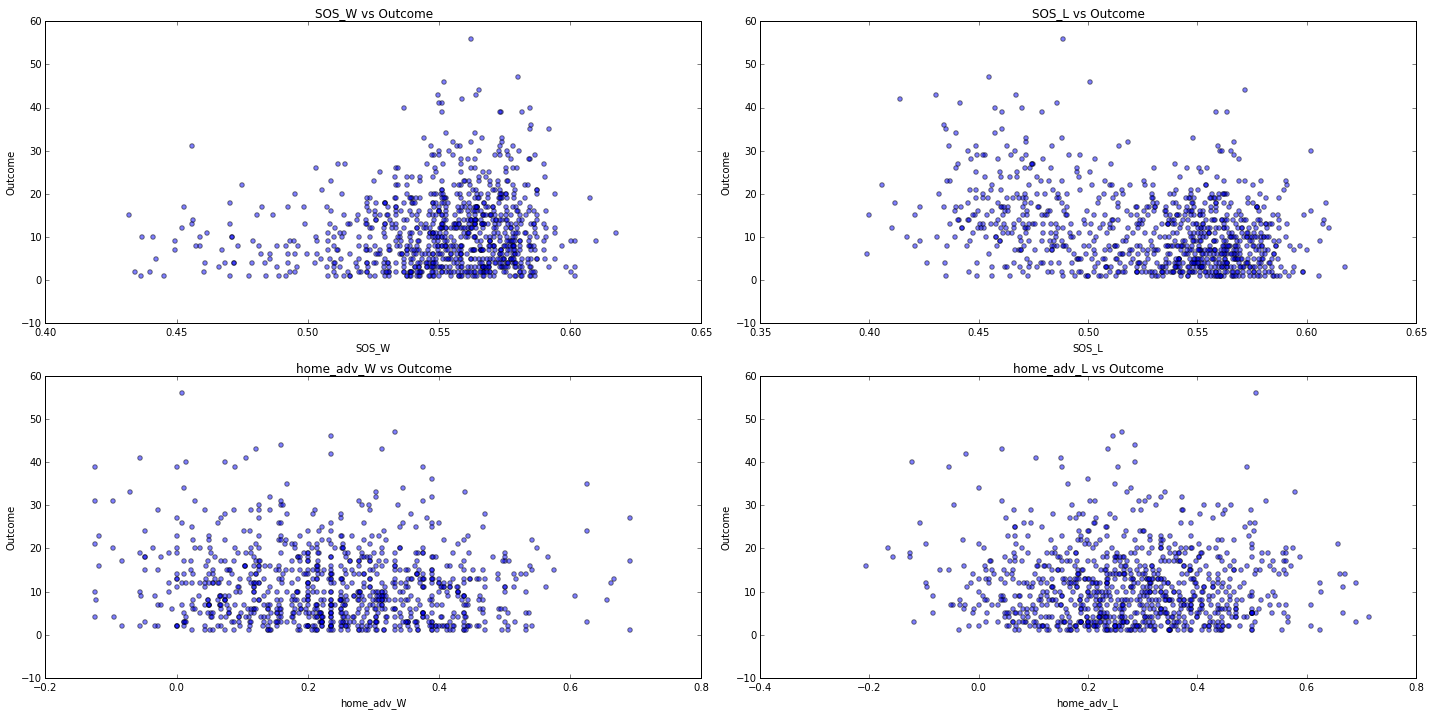

In [9]:
#Creates correlation charts for each variable
create_correl_charts(tourney, 'Outcome', ['SOS_W', 'SOS_L', 'home_adv_W', 'home_adv_L'])

            o3P_W     o3P_L     d3P_W    d3P_L
Outcome -0.022145 -0.021447  0.054962  0.02937


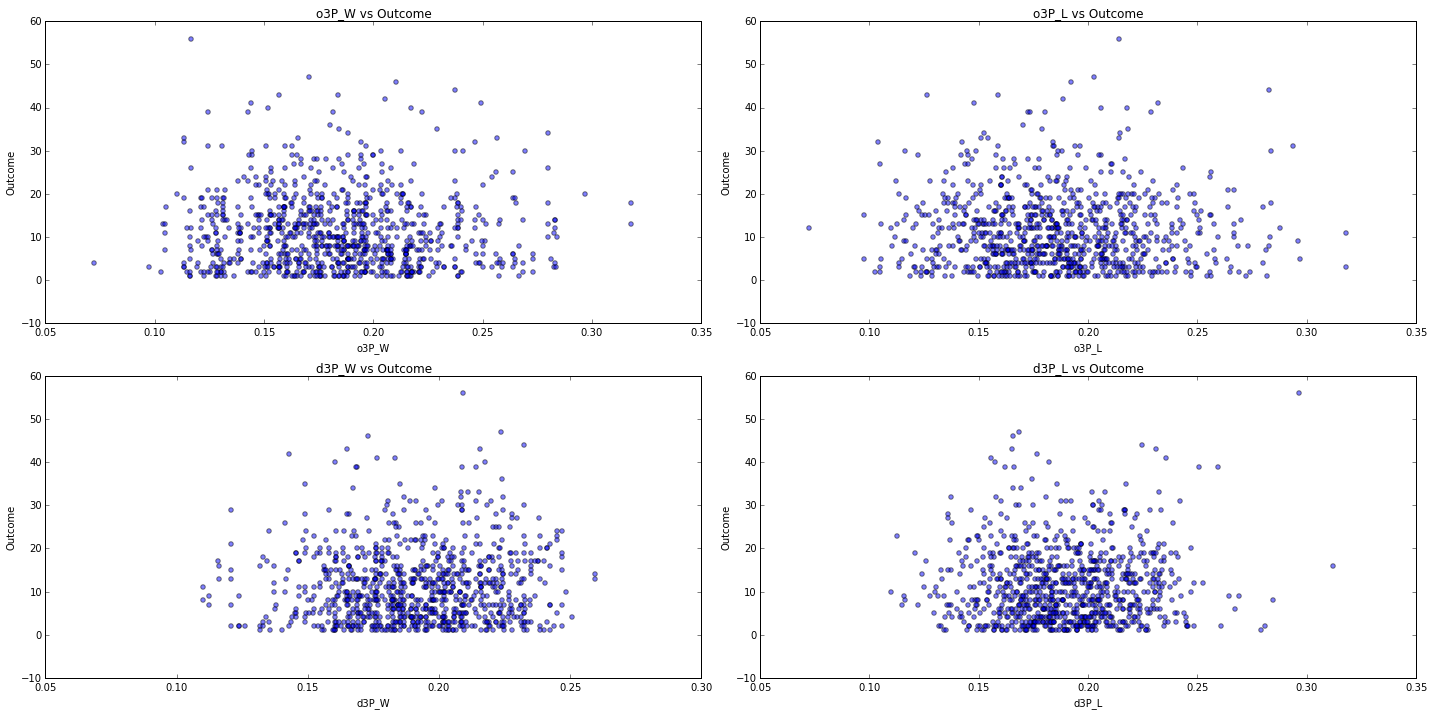

In [10]:
#Creates correlation charts for each variable
create_correl_charts(tourney, 'Outcome', ['o3P_W', 'o3P_L', 'd3P_W', 'd3P_L'])

         WinPct_W  WinPct_L  Clutch_W  Clutch_L
Outcome  0.199351 -0.217238 -0.035281   0.10549


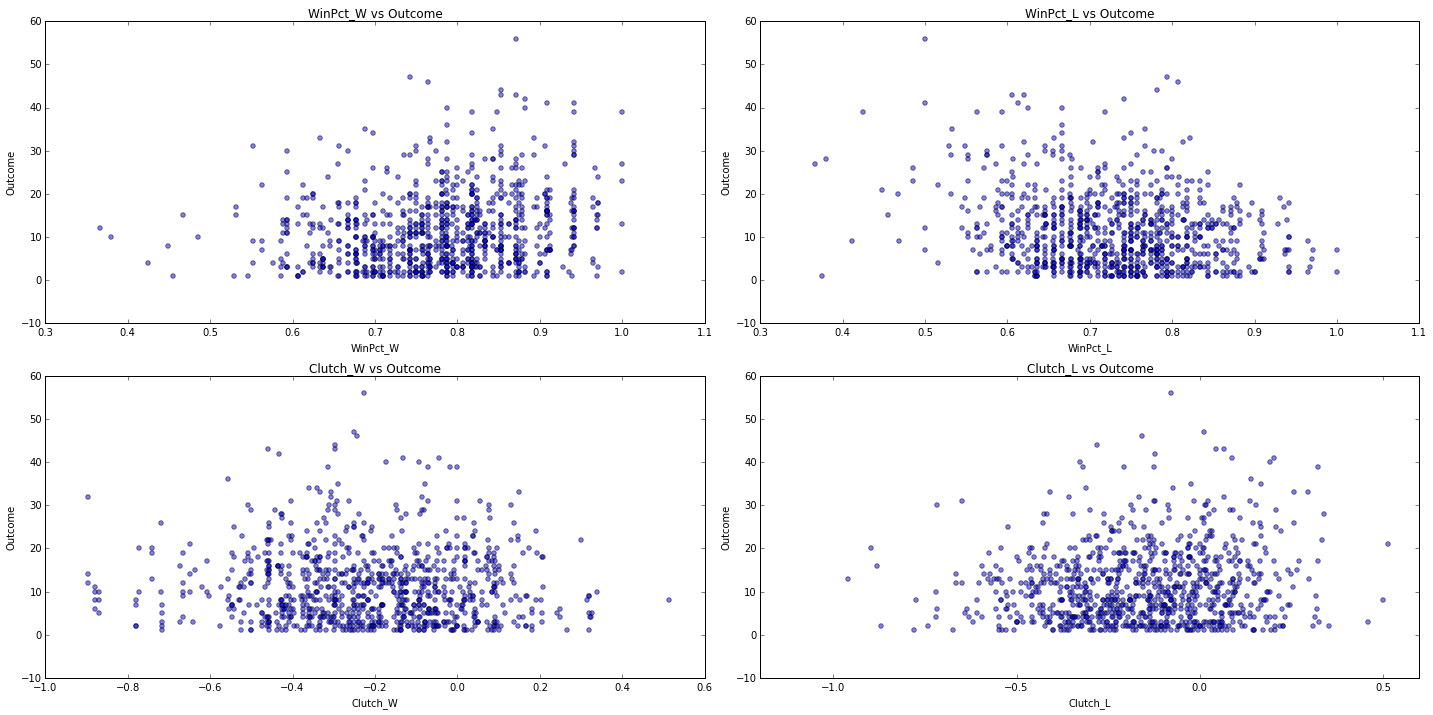

In [11]:
#Creates correlation charts for each variable
create_correl_charts(tourney, 'Outcome', ['WinPct_W', 'WinPct_L', 'Clutch_W', 'Clutch_L'])